In [13]:
from data_clean import cleaning
from f_global import read_copy_csv, df_info, new_df, mask_value
from visualisation import heatmap_and_cluster, scatter, plot
from ml_time_serie import time_serie

In [14]:
ethereum_day = read_copy_csv("data/ETHUSD_day.csv")

In [15]:
ethereum_day = cleaning(ethereum_day)

In [16]:
df_info(ethereum_day)


        Longueur du dataset : 1828 enregistrements
        Nombre de colonnes : 6
        


,type,Echantillon,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
Date,datetime64[ns],"[Timestamp('2021-05-10 00:00:00'), Timestamp('...",0.0,0,1828
Opening_Price_ETH,float64,"[4060.21, 3874.49, 3539.73, 3427.49, 3478.06]",0.0,0,1738
Highest_rice_ETH,float64,"[4345.44, 4077.7, 3968.37, 3595.0, 3598.05]",0.0,0,1690
Lowest_Price_ETH,float64,"['Lowest_Price_ETH', 'Lowest_Price_ETH']",0.0,0,1667
Lowest_Price_ETH,float64,"['Lowest_Price_ETH', 'Lowest_Price_ETH']",0.0,0,1725
Vol_ETH,float64,"[49801.11878, 23638.51668, 25676.87443, 15974....",0.0,0,1805


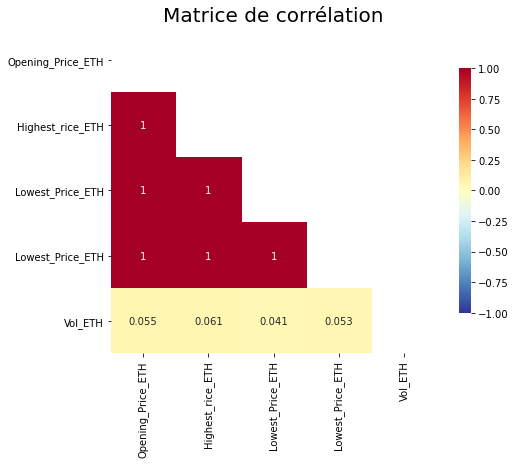

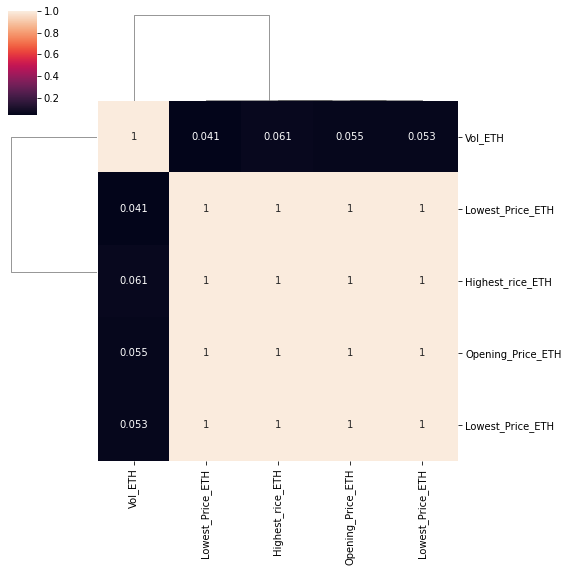

In [17]:
heatmap_and_cluster(ethereum_day);

In [18]:
ethereum_day_opening_price = new_df(ethereum_day, ["Date", "Opening_Price_ETH"])

In [52]:
event = {'event_1' : {'x':'2017-05-01', 'y': 90, 'text': 'Boom des cryptos'},
         'event_2' : {'x':'2018-01-13', 'y': 1432, 'text': '1er record historique : 1432$'},
         'event_3' : {'x':'2020-11-10', 'y': 500, 'text': 'V2.0'}, 
         'event_4' : {'x': '2021-05-10', 'y': 4000, 'text': 'Record historique : 4165$'}}

scatter(ethereum_day_opening_price, "ds", "y", event)

In [21]:
model, forecast = time_serie("multiplicative", ethereum_day_opening_price, 365);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
plot(model, forecast)